Patrick BROCKMANN<br>
Data Analysis and Visualization Engineer at LSCE (Climate and Environment Sciences Laboratory)<br>
<img align="left" width="40%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png"><br><br>
<hr>

Updated 2017/03/16

## Presentation

This notebook proposes python code to plots maps from simulations published in <a href="http://www.biogeosciences.net/10/6225/2013/">Bopp et al. (2013)</a> to assess how four major stressors of open ocean ecosystems could evolve over the course of the 21st century: sea surface warming, surface pH, subsurface dissolved O2 concentration, and primary productivity by marine phytoplankton (NPP).

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid, addcyclic
import numpy as np
import collections
import netCDF4
%matplotlib inline
print matplotlib.__version__

1.5.1


### Read the data

In [2]:
rcp_dict = collections.OrderedDict()
rcp_dict['rcp85'] = 'RCP 8.5'       # RCP: Representative Concentration Pathway
rcp_dict['rcp60'] = 'RCP 6.0'
rcp_dict['rcp45'] = 'RCP 4.5'
rcp_dict['rcp26'] = 'RCP 2.6' 

var_dict = collections.OrderedDict()    # [tuple(min,max,delta), color map, scale factor, title]        
var_dict['sst'] = [(-4,4,0.5), plt.cm.RdYlBu_r, 1., u'Sea surface temperature change [°C]']            
var_dict['pH'] = [(-0.5,0.5,0.05), plt.cm.BrBG, 1., u'Sea surface pH change']
var_dict['subO2'] = [(-50,50,5), plt.cm.PuOr, 1000., u'Oxygen concentration change at 200-600m [$\mu$mol/L]']
var_dict['intpp'] = [(-200,200,10), plt.cm.PiYG, 1., u'Integrated net primary productivity change [gC/m2/y]']

In [3]:
var = {} ; sign = {}
for varName in var_dict.keys():
    var[varName] = {} ; sign[varName] = {}
    scaleFactor = var_dict[varName][2]
    print 'Reading ' + varName + ' with scale factor: ', scaleFactor
    for rcpName in rcp_dict.keys():
        file = "/prodigfs/project/CARBON/CRESCENDO/MAPS/" + varName + "_" + rcpName + "_MEAN_r1i1p1_2090_2099.nc"
        print '   ', file  
        f = netCDF4.Dataset(file)
        #print f.variables.keys()
        latitude = f.variables['LATITUDE'][:]
        longitude = f.variables['LONGITUDE'][:]
        var[varName][rcpName] = f.variables['TEMP'][0,...].squeeze() * scaleFactor
        sign[varName][rcpName] = f.variables['SIGN'][0,...].squeeze()
        f.close()

Reading sst with scale factor:  1.0
    /prodigfs/project/CARBON/CRESCENDO/MAPS/sst_rcp85_MEAN_r1i1p1_2090_2099.nc
    /prodigfs/project/CARBON/CRESCENDO/MAPS/sst_rcp60_MEAN_r1i1p1_2090_2099.nc
    /prodigfs/project/CARBON/CRESCENDO/MAPS/sst_rcp45_MEAN_r1i1p1_2090_2099.nc
    /prodigfs/project/CARBON/CRESCENDO/MAPS/sst_rcp26_MEAN_r1i1p1_2090_2099.nc
Reading pH with scale factor:  1.0
    /prodigfs/project/CARBON/CRESCENDO/MAPS/pH_rcp85_MEAN_r1i1p1_2090_2099.nc
    /prodigfs/project/CARBON/CRESCENDO/MAPS/pH_rcp60_MEAN_r1i1p1_2090_2099.nc
    /prodigfs/project/CARBON/CRESCENDO/MAPS/pH_rcp45_MEAN_r1i1p1_2090_2099.nc
    /prodigfs/project/CARBON/CRESCENDO/MAPS/pH_rcp26_MEAN_r1i1p1_2090_2099.nc
Reading subO2 with scale factor:  1000.0
    /prodigfs/project/CARBON/CRESCENDO/MAPS/subO2_rcp85_MEAN_r1i1p1_2090_2099.nc
    /prodigfs/project/CARBON/CRESCENDO/MAPS/subO2_rcp60_MEAN_r1i1p1_2090_2099.nc
    /prodigfs/project/CARBON/CRESCENDO/MAPS/subO2_rcp45_MEAN_r1i1p1_2090_2099.nc
    /prodigfs/pro

### Mapping

#### One map

In [4]:
varName = 'sst' ; rcpName = 'rcp85'
print var_dict[varName][3]
print rcp_dict[rcpName]

Sea surface temperature change [°C]
RCP 8.5


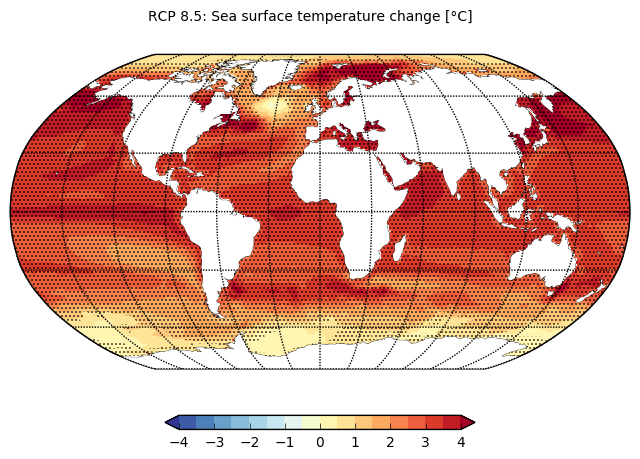

In [5]:
plt.figure(figsize=(8,6))
map = Basemap(projection='robin', lat_0=0, lon_0=0, resolution='c')

map.fillcontinents(color='white', lake_color='white', zorder=2)
map.drawcoastlines(linewidth=0.5)
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

lons, lats = np.meshgrid(longitude, latitude)

(min, max, delta) = var_dict[varName][0]
colorMap = var_dict[varName][1]
levels = np.arange(min, max+delta, delta)
colors = colorMap(np.linspace(0, 1, len(levels)+1))
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend='both')

im = map.pcolor(lons, lats, var[varName][rcpName], cmap=cmap, norm=norm, latlon=True)
map.pcolor(lons, lats, sign[varName][rcpName], cmap=plt.cm.gray_r, vmin=0, vmax=1, latlon=True, hatch='...', alpha=0)

plt.colorbar(im, orientation='horizontal', shrink=0.5, pad=0.1)
title = var_dict[varName][3]
plt.figtext(0.5, 0.9, rcp_dict[rcpName] + ': ' + title , fontsize=10, horizontalalignment='center') 

#plt.savefig('figure.pdf')
plt.show()

#### One variable with different scenarios

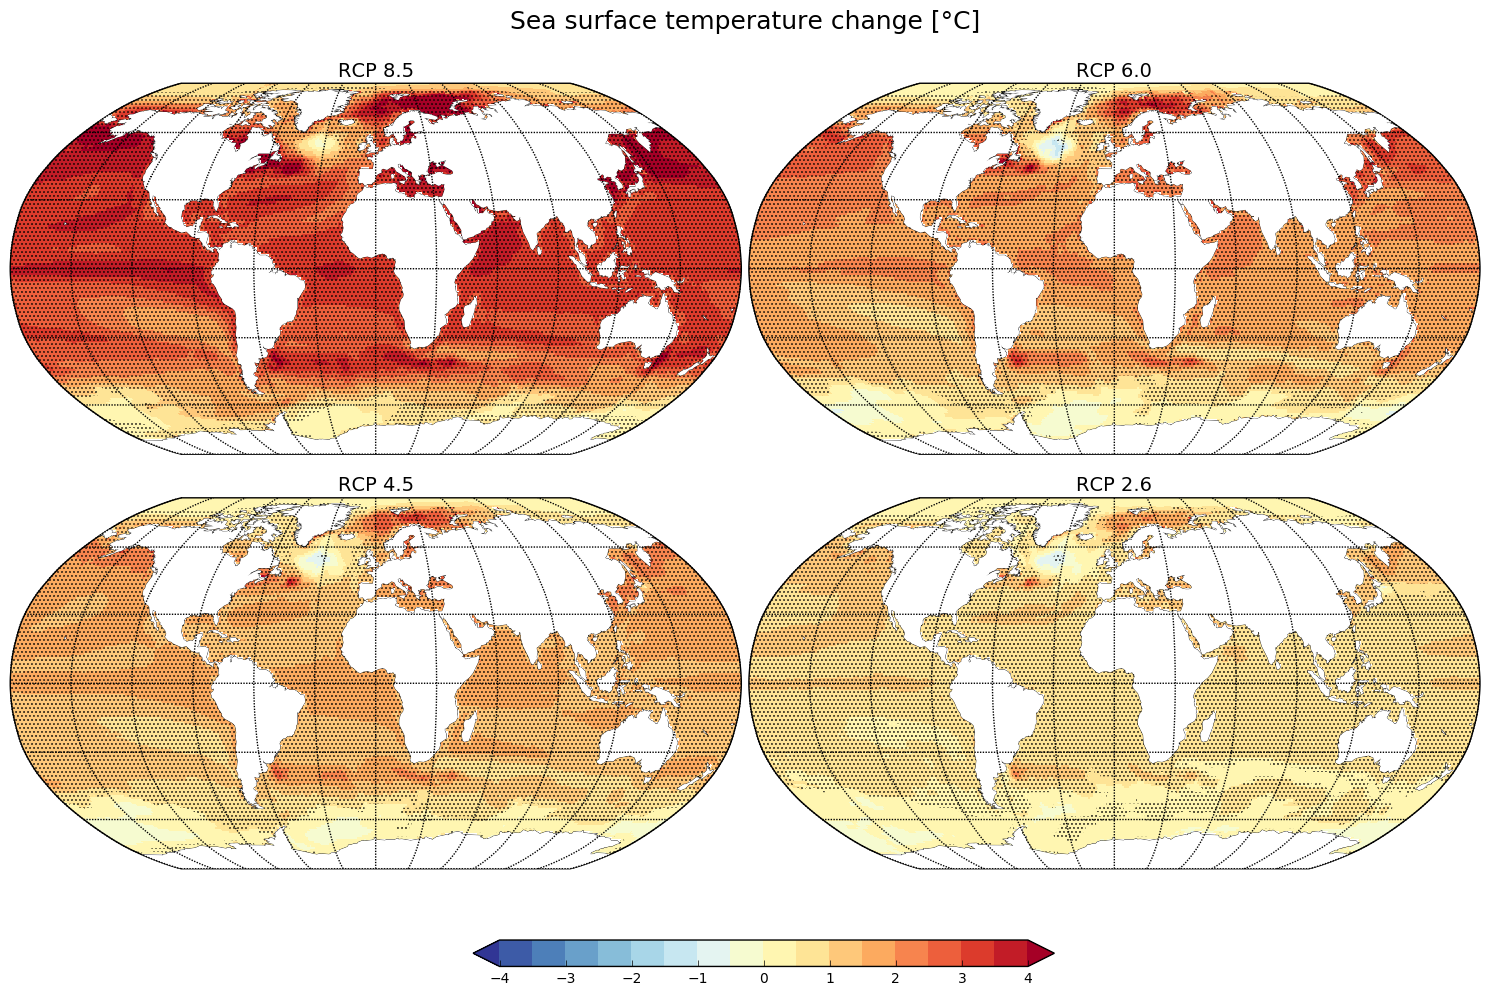

In [6]:
varName = 'sst'

(min, max, delta) = var_dict[varName][0]
colorMap = var_dict[varName][1]
levels = np.arange(min, max+delta, delta)
colors = colorMap(np.linspace(0, 1, len(levels)+1))
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend='both')

#--------------------------
lons, lats = np.meshgrid(longitude, latitude)

#--------------------------
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

#--------------------------
for i,rcpName in enumerate(rcp_dict.keys()):

    map = Basemap(projection='robin', lat_0=0, lon_0=0, resolution='c', ax=axes.flat[i])
    map.fillcontinents(color='white', lake_color='white', zorder=2)
    map.drawcoastlines(linewidth=0.5)
    map.drawmeridians(np.arange(0, 360, 30))
    map.drawparallels(np.arange(-90, 90, 30))
    im = map.pcolor(lons, lats, var[varName][rcpName], cmap=cmap, norm=norm, latlon=True)
    map.pcolor(lons, lats, sign[varName][rcpName], cmap=plt.cm.gray_r, vmin=0, vmax=1, latlon=True, hatch='...', alpha=0)
    axes.flat[i].set_title(rcp_dict[rcpName], fontsize=14)

#--------------------------
fig.text(0.5, 0.76, var_dict[varName][3], fontsize=18, horizontalalignment='center') 
fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal', shrink=0.5, pad=0, anchor=(0.5, 0.1))
fig.subplots_adjust(hspace=0.01, wspace=0.01, bottom=0.20, top=0.75, left=0.01, right=0.99)

#--------------------------
#plt.savefig(varName + '_all.pdf')
plt.savefig(varName + '_all.png')
plt.show()

#### One scenario with different variables

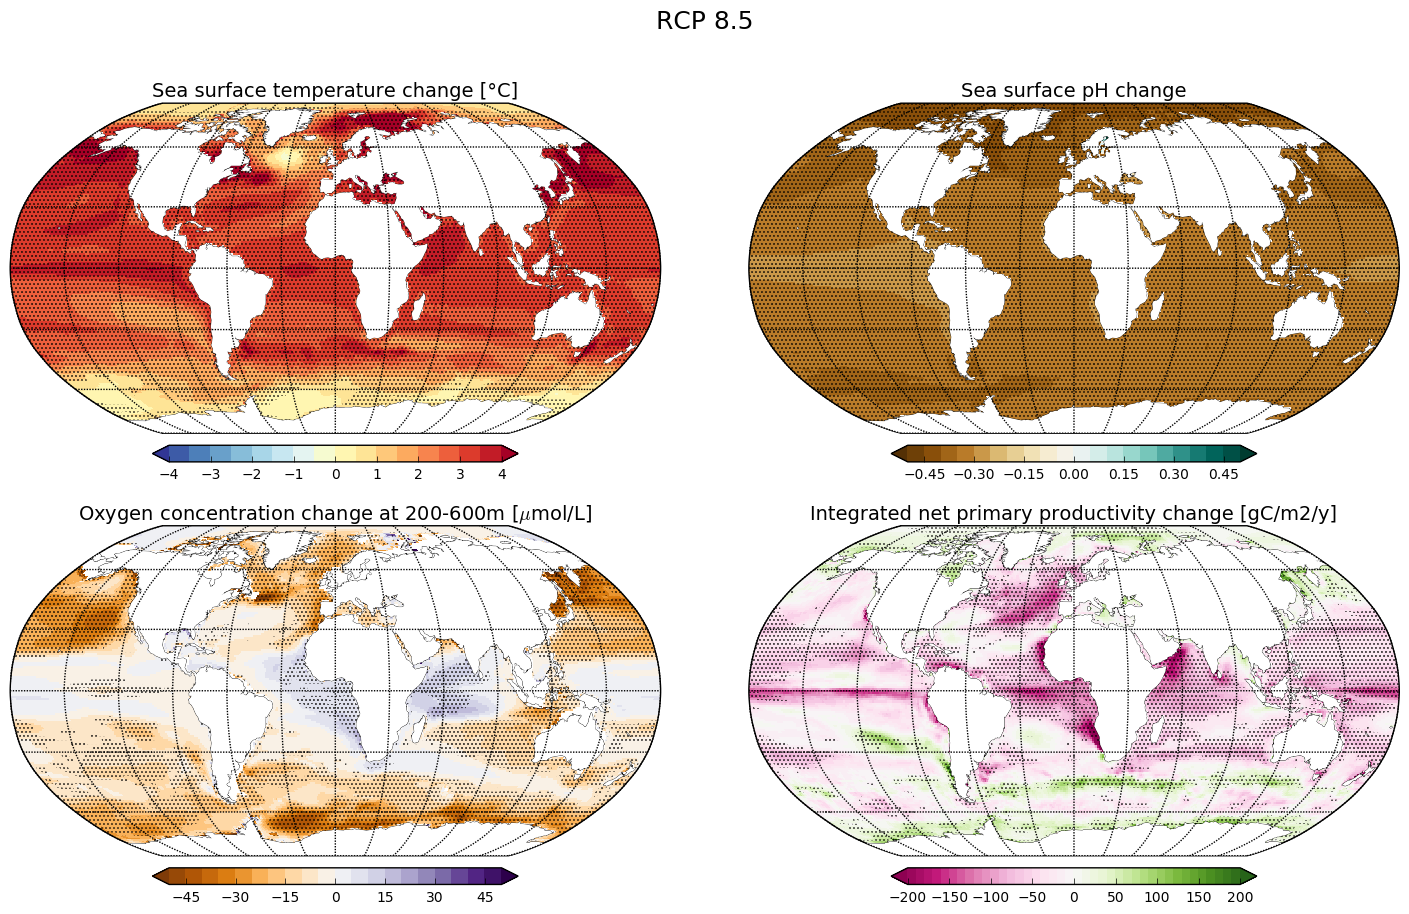

In [7]:
rcpName = 'rcp85'

#--------------------------
lons, lats = np.meshgrid(longitude, latitude)

#--------------------------
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

#--------------------------
for i,varName in enumerate(var_dict.keys()):
    
    (min, max, delta) = var_dict[varName][0]
    colorMap = var_dict[varName][1]
    levels = np.arange(min, max+delta, delta)
    colors = colorMap(np.linspace(0, 1, len(levels)+1))
    cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend='both')

    map = Basemap(projection='robin', lat_0=0, lon_0=0, resolution='c', ax=axes.flat[i])
    map.fillcontinents(color='white', lake_color='white', zorder=2)
    map.drawcoastlines(linewidth=0.5)
    map.drawmeridians(np.arange(0, 360, 30))
    map.drawparallels(np.arange(-90, 90, 30))
    im = map.pcolor(lons, lats, var[varName][rcpName], cmap=cmap, norm=norm, latlon=True)
    map.pcolor(lons, lats, sign[varName][rcpName], cmap=plt.cm.gray_r, vmin=0, vmax=1, latlon=True, hatch='...', alpha=0)
    title = var_dict[varName][3]
    axes.flat[i].set_title(title, fontsize=14)
    fig.colorbar(im, ax=axes.flat[i], orientation='horizontal', shrink=0.5, pad=0.03)

#--------------------------
fig.text(0.5, 0.8, rcp_dict[rcpName], fontsize=18, horizontalalignment='center') 
fig.subplots_adjust(hspace=0.05, wspace=0.01, bottom=0.20, top=0.75, left=0.01, right=0.99)

#--------------------------
#plt.savefig(rcpName + '_all.pdf')
plt.savefig(rcpName + '_all.png')
plt.show()